In [2]:
### 週販レポート2025年版

# 標準ライブラリ
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he

hard_sales_df = hs.load_hard_sales()
hard_event_df = he.load_hard_event()



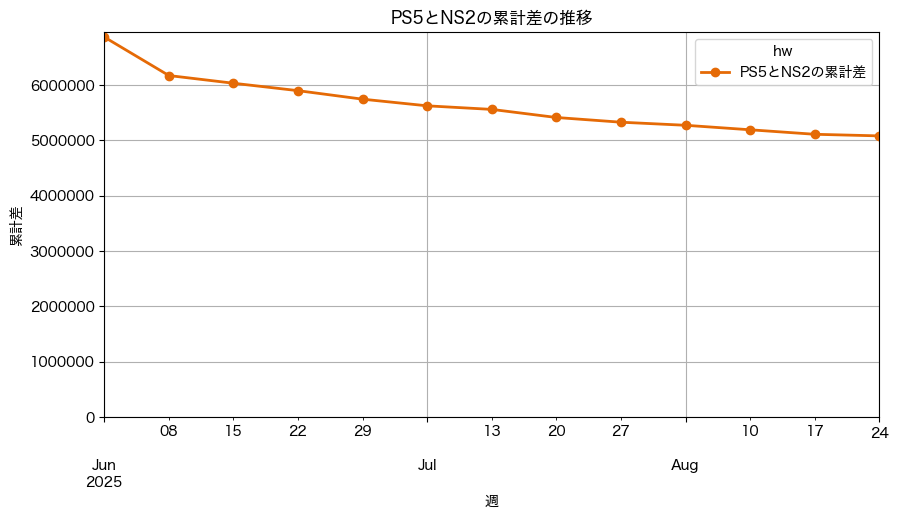

In [4]:
def cumsum_diff(df:pd.DataFrame, base_hw:str, cmp_hw:str) -> pd.DataFrame:
    cumsum_df = hs.pivot_cumulative_sales(df, hw=[base_hw, cmp_hw])
    # column:cmp_hwの値がNA以外になった最初の行の直前のindexを得る
    first_valid_index = cumsum_df[cmp_hw].first_valid_index()
    if first_valid_index is not None:
        idx_list = list(cumsum_df.index)
        pos = idx_list.index(first_valid_index)
        # 直前の行が存在する場合はそのindexから
        start_pos = max(pos - 1, 0)
        start_index = idx_list[start_pos]
        cumsum_df = cumsum_df[cumsum_df.index >= start_index]

    cumsum_df = cumsum_df.fillna(0)
    cumsum_df["diff"] = cumsum_df[base_hw] - cumsum_df[cmp_hw]
    cumsum_df = cumsum_df[cumsum_df["diff"] >= -20000]
    return cumsum_df[["diff"]].rename(columns={"diff": f"{base_hw}と{cmp_hw}の累計差"})

def plot_cumsum_diff(df:pd.DataFrame, base_hw:str, cmp_hw:str, marker:bool=True) -> None:
    cumsum_diff_df = cumsum_diff(df, base_hw, cmp_hw)

    fig, ax = plt.subplots(figsize=ph.get_figsize())
    plt.rcParams['font.family'] = 'Hiragino Sans'
    plt.rcParams['axes.unicode_minus'] = False
    if marker:
        marker_str = 'o'
    else:
        marker_str = ''
    cumsum_diff_df.plot(ax=ax, kind='line', marker=marker_str, 
                        linewidth=2, color="#E56A06")
    ax.set_title(f"{base_hw}と{cmp_hw}の累計差の推移")
    ax.set_xlabel("週")
    ax.set_ylabel("累計差")
    # 縦軸の表示を指数表示から整数表示に変更
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    ax.ticklabel_format(style='plain', axis='y')
    ax.set_ylim(bottom=0)
    ax.grid(True)

plot_cumsum_diff(hard_sales_df, "PS5", "NS2")


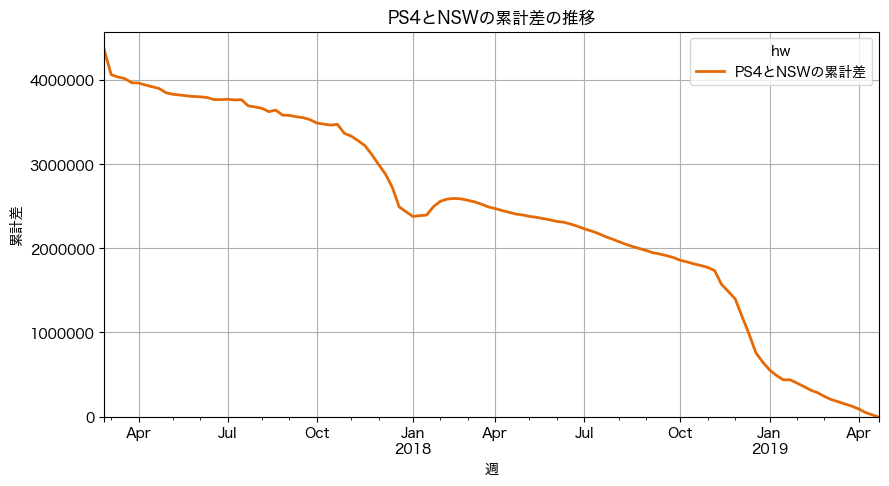

In [5]:

ps4_nsw = plot_cumsum_diff(hard_sales_df, "PS4", "NSW", marker=False)
